Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

-> Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


    the above features are the key features of the red wine dataset

Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

-> There are no missing data in the wine quality data , so we dont have to do anything to handle the missing value in the wine quality. Below are the different imputation techniques and their advantages and disadvantes 

mean : It fills the the missing value with the most suitable data for the dataset having no outliers , it is sensitive to the outliers
median : It fills the missing value with the middle value which may be too small or too big , it can handle outliers
mode : it fills the missing value with  the most probable terms , not suitable if we have the dataset with mode being very small or big with respect to the mean and other datapoints have nearly the same frequency as that of a mode.

smote : It helps to increase the focus of the model towards to the feature having very less datapoints, it helps in making prediction in favour of the points which have very less datapoints else it may so happen that model may not adequately for the features having very less datapoints. It disadvantage is that too much focus may be given to the feature having very less number of datapoints so the accuracy of the model decreases.

upsampling and downsampling have same advantage and disadvantage as that of smote

Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

-> Gender , parental level of eduacation 


	gender	race_ethnicity	parental_level_of_education	lunch	test_preparation_course	math_score	reading_score	writing_score
0	female	group B	bachelor's degree	standard	none	72	72	74
1	female	group C	some college	standard	completed	69	90	88
2	female	group B	master's degree	standard	none	90	95	93
3	male	group A	associate's degree	free/reduced	none	47	57	44
4	male	group C	some college	standard	none	76	7


Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

-> separating the categorical and numerical data 
making a new column for the total score 
making a new column for the average score
here we selected and transform the variable by the above steps 
finally we use python visualisation to draw insights from the data

Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

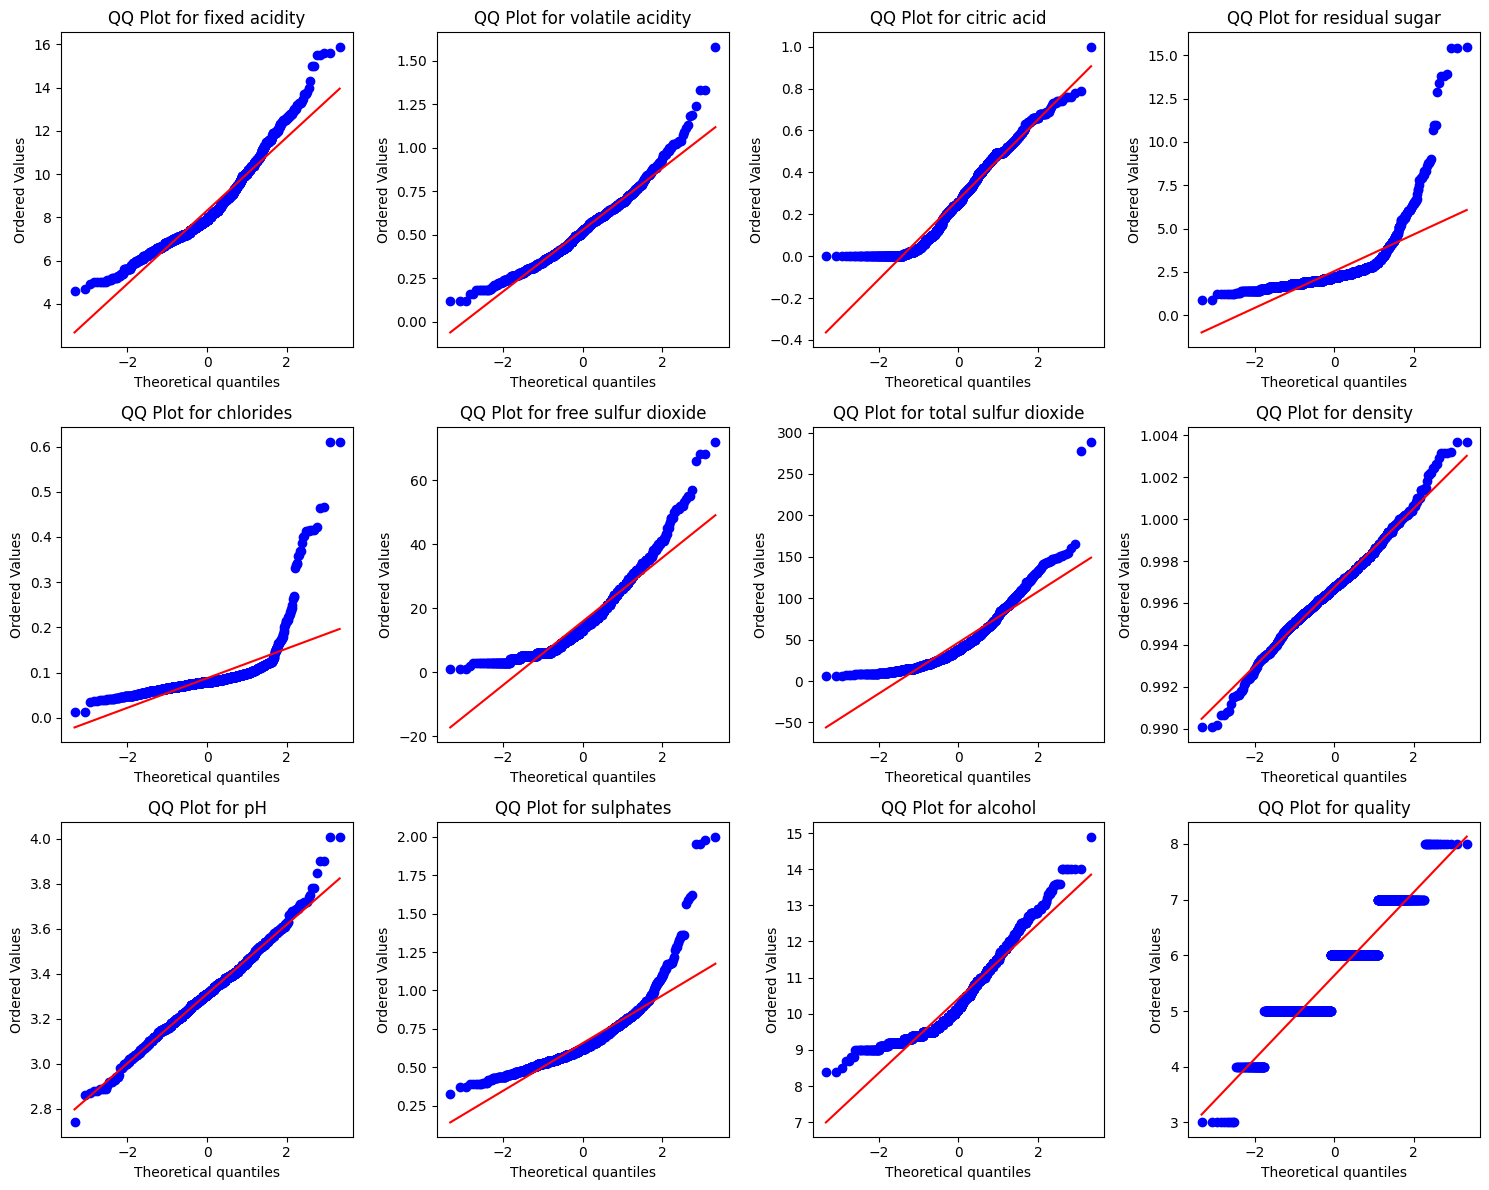

fixed acidity , volatile acidity,density,PH ,quality and alcohol exhibits normality and remaining feature do not exhibit normality


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the dataset
df = pd.read_csv("winequality-red.csv")

# Select numerical columns for the QQ plots
numerical_columns = df.select_dtypes(include='number').columns

# Create QQ plots for each numerical column
plt.figure(figsize=(15, 12))
for column_name in numerical_columns:
    plt.subplot(3, 4, numerical_columns.get_loc(column_name) + 1)  # Adjust the subplot grid based on the number of columns
    stats.probplot(df[column_name], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {column_name}')

plt.tight_layout()
plt.show()

print("fixed acidity , volatile acidity,density,PH ,quality and alcohol exhibits normality and remaining feature do not exhibit normality")
# to make the citric acid exhibit normailty we must not consider the initial values 
# to me the residual sugar exhibit normality we must not consider the last values 
# last values of chlorides do not exhibit normality so if we dont consider the last values than the remaining portion does exhibit normality



Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

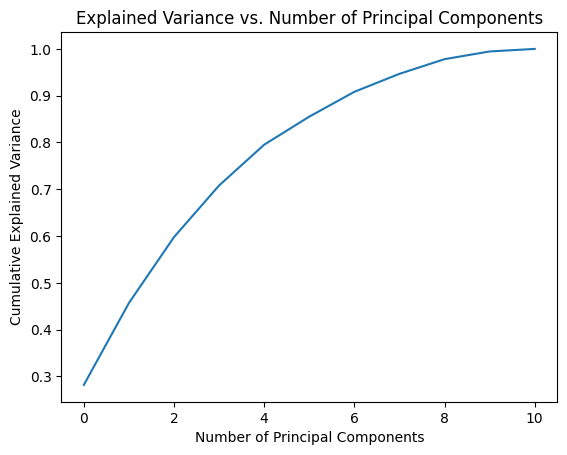

Minimum number of principal components to explain 90% of the variance: 7


In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np



# Separate features and labels
X = df.drop('quality', axis=1)  # Assuming 'quality' is the target variable

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the minimum number of principal components to explain 90% of the variance
num_components_90 = np.argmax(cumulative_variance >= 0.9) + 1

# Plot the explained variance
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.show()

# Print the result
print(f"Minimum number of principal components to explain 90% of the variance: {num_components_90}")
